In [35]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#warnings
import warnings
warnings.filterwarnings("ignore")

In [37]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
#Importing Data
data=pd.read_csv("/content/drive/MyDrive/Iris.csv")

In [39]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
#Null Values
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [42]:
#Duplicates
data.duplicated().sum()

0

In [43]:
#Dropping duplicates
data.drop_duplicates(inplace=True)

In [44]:
data.duplicated().sum()

0

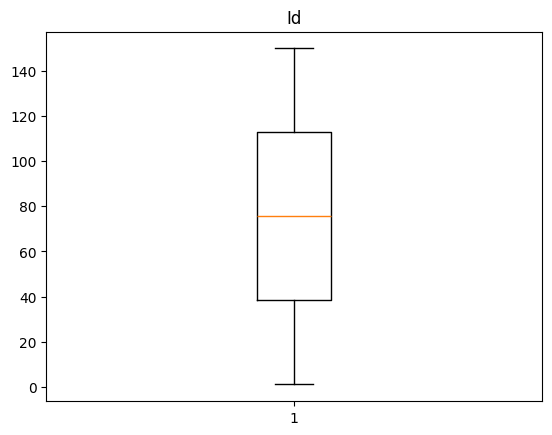

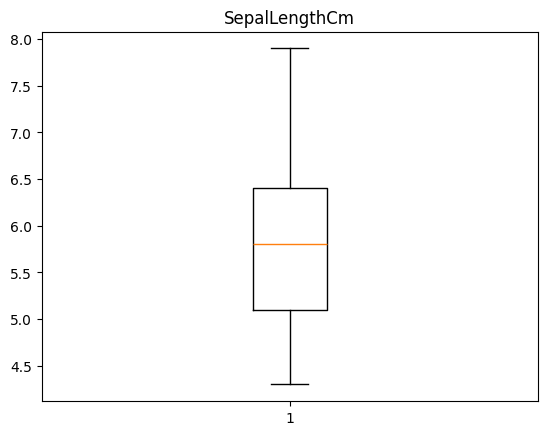

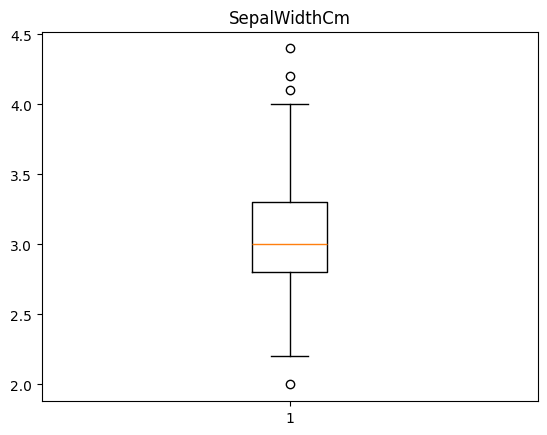

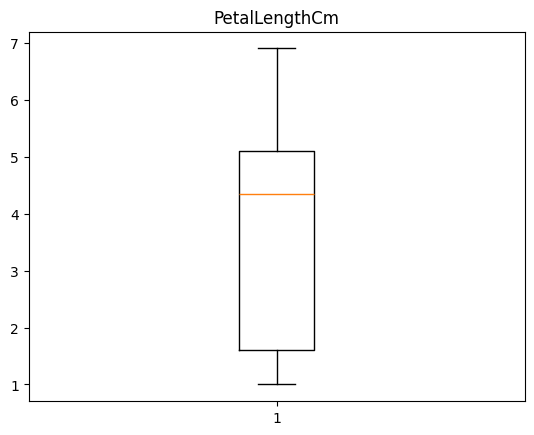

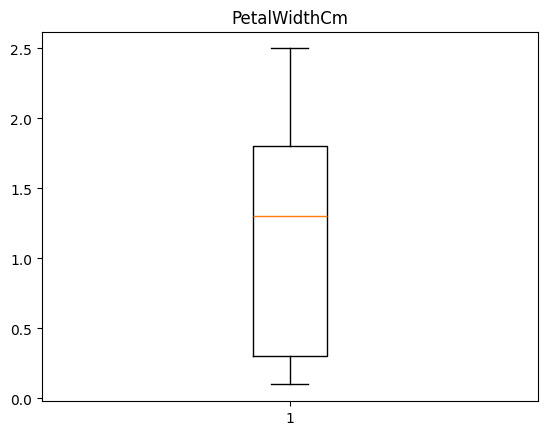

In [45]:
#outliers
for col in data.columns:
    if data[col].dtype!="object":
        plt.boxplot(data[col])
        plt.title(col)
        plt.show()

In [46]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [47]:
#selecting features having outliers
out_cols=['SepalWidthCm']

In [48]:
for col in out_cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    IQR=q3-q1
    UL=q3+1.5*IQR
    LL=q1-1.5*IQR
    data=data[(data[col]>=LL)&(data[col]<=UL)]

In [49]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()

In [52]:
for col in data.columns:
    if data[col].dtype=="object":
        data[col]=le.fit_transform(data[col])
        print(le.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [53]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             146 non-null    int64  
 1   SepalLengthCm  146 non-null    float64
 2   SepalWidthCm   146 non-null    float64
 3   PetalLengthCm  146 non-null    float64
 4   PetalWidthCm   146 non-null    float64
 5   Species        146 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 8.0 KB


In [55]:
#Correlation
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.718722,-0.384320,0.880016,0.898193,0.942059
SepalLengthCm,0.718722,1.000000,-0.113977,0.879374,0.822577,0.788053
SepalWidthCm,-0.384320,-0.113977,1.000000,-0.397123,-0.329782,-0.397265
PetalLengthCm,0.880016,0.879374,-0.397123,1.000000,0.961755,0.947469
PetalWidthCm,0.898193,0.822577,-0.329782,0.961755,1.000000,0.955549
Species,0.942059,0.788053,-0.397265,0.947469,0.955549,1.000000


In [56]:
x=data.drop(['Species'],axis=1)
y=data[["Species"]]

In [57]:
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [58]:
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [59]:
data["Species"].unique()

array([0, 1, 2])

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
#Feature Selection
from sklearn.feature_selection import RFE
rfe=RFE(LogisticRegression(),n_features_to_select=10)
fit=rfe.fit(x,y)

print("selected features:%s"%fit.support_)
print("selected features:%s"%fit.ranking_)

selected features:[ True  True  True  True  True]
selected features:[1 1 1 1 1]


In [62]:
#Important columns after feature selection
imp_columns=x.columns[rfe.get_support()]
imp_columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [63]:
x=x[imp_columns]
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [66]:
x_train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
121,122,5.6,2.8,4.9,2.0
137,138,6.4,3.1,5.5,1.8
29,30,4.7,3.2,1.6,0.2
43,44,5.0,3.5,1.6,0.6
108,109,6.7,2.5,5.8,1.8
...,...,...,...,...,...
75,76,6.6,3.0,4.4,1.4
110,111,6.5,3.2,5.1,2.0
14,15,5.8,4.0,1.2,0.2
96,97,5.7,2.9,4.2,1.3


In [67]:
y_train

,Species
121,2
137,2
29,0
43,0
108,2
...,...
75,1
110,2
14,0
96,1


In [68]:
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
48,49,5.3,3.7,1.5,0.2
101,102,5.8,2.7,5.1,1.9
28,29,5.2,3.4,1.4,0.2
20,21,5.4,3.4,1.7,0.2
45,46,4.8,3.0,1.4,0.3
124,125,6.7,3.3,5.7,2.1
30,31,4.8,3.1,1.6,0.2
84,85,5.4,3.0,4.5,1.5
70,71,5.9,3.2,4.8,1.8
19,20,5.1,3.8,1.5,0.3


In [69]:
y_test

,Species
48,0
101,2
28,0
20,0
45,0
124,2
30,0
84,1
70,1
19,0


Model Building

In [70]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [71]:
y_pred=model.predict(x_test)
y_pred

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0])

In [72]:
from sklearn.metrics import *

In [73]:
#Accuracy Score
np.round(accuracy_score(y_test,y_pred)*100,2)

100.0

In [74]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 16]])

<Axes: >

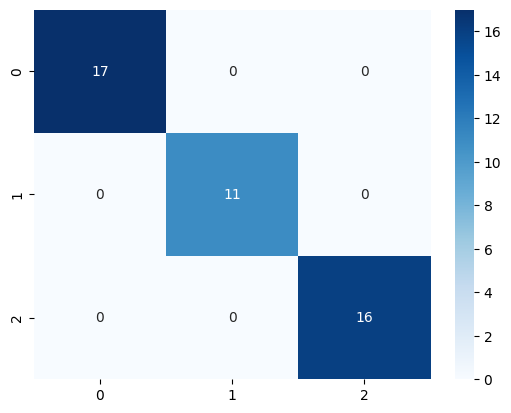

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d")